In this script, the random forest method is going to be applied on the "telco.csv" dataset in order to collect information about churn. Random forest method is applied for the following reasons: there is no need for feature normalization, random forests are widely used, and they reduce overfitting.

First of all, the loading the required libraties for the analysis is necessary.

In [33]:
#For storing and manipulating data
import pandas as pd

#For plotting manners
import matplotlib.pyplot as plt 
import pydot

#For array and mathematical exercises
import numpy as np 

#Collection of various predictive analysis techniques
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz

In [34]:
#Loading the data from 'telco.csv' into a pandas Dataframe object
df = pd.read_csv("telco.csv")

#Checking the top 5 values of the data object
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat,churn
0,2,13,44,1,9,64.0,4,5,0.0,0,...,0,0,0,0,0,1,0,0,1,1
1,3,11,33,1,7,136.0,5,5,0.0,0,...,1,1,0,1,1,1,1,0,4,1
2,3,68,52,1,24,116.0,1,29,0.0,1,...,0,0,0,1,1,0,1,0,3,0
3,2,33,33,0,12,33.0,2,0,0.0,1,...,0,0,0,0,0,0,0,0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,...,0,0,0,1,0,1,1,0,3,0


In [35]:
#Overlook each column of the dataset
df.describe()

#From the count row, it is clearly visible that there are no gaps in the dataset.
#The dataset only containes numerical values, therefore, no One-Hot Encoding is neccesarry here.

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat,churn
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,...,0.304000,0.2610,0.368000,0.481000,0.485000,0.493000,0.502000,0.371000,2.487000,0.274000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,...,0.460213,0.4394,0.482503,0.499889,0.500025,0.500201,0.500246,0.483314,1.120306,0.446232
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,...,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,...,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,...,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [36]:
#Setting up the data for the random forest method
# Labels are the values we intended to predict. 
# Added +1 to each element in the list in order to avoid further problems.  
labels = np.array(df['churn'])
labels = np.asarray([x+1 for x in labels])

# Remove the labels from the features. axis 1 refers to the columns
mod_df= df.drop('churn', axis = 1)

# Saving feature names for later use
moddf_list = list(mod_df.columns)

#Turning the data file from Dataframe into a Numpy array
moddf_tab = np.array(mod_df)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(
        moddf_tab, labels, test_size = 0.4, random_state = 42)

#Check at the shape of all the data to make sure everything is calculated correctly.
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (600, 35)
Training Labels Shape: (600,)
Testing Features Shape: (400, 35)
Testing Labels Shape: (400,)


In [37]:
# Instantiate random forest model
rf = RandomForestRegressor(n_estimators = 100, random_state = 5)

# Applying the training procedure on the training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / (test_labels * 1.))

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('This model has learned how to predict churn with the accuracy of',
      round(accuracy, 2), '% (based on mean absolute percentage error [MAPE]).')

This model has learned how to predict churn with the accuracy of 74.95 % (based on mean absolute percentage error [MAPE]).


In [38]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree_ref.dot', feature_names = moddf_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('tree_ref.dot')

# Write graph to a png file
graph.write_png('tree_ref.png')

In [39]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(moddf_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: longten              Importance: 0.12
Variable: tenure               Importance: 0.08
Variable: income               Importance: 0.07
Variable: equipmon             Importance: 0.07
Variable: equipten             Importance: 0.07
Variable: address              Importance: 0.06
Variable: employ               Importance: 0.06
Variable: longmon              Importance: 0.06
Variable: cardten              Importance: 0.06
Variable: age                  Importance: 0.05
Variable: ed                   Importance: 0.03
Variable: equip                Importance: 0.03
Variable: cardmon              Importance: 0.03
Variable: tollten              Importance: 0.03
Variable: region               Importance: 0.02
Variable: reside               Importance: 0.02
Variable: tollmon              Importance: 0.02
Variable: wiremon              Importance: 0.02
Variable: internet             Importance: 0.02
Variable: marital              Importance: 0.01
Variable: gender               Importanc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Text(0.5, 1.0, 'Variable Importances')

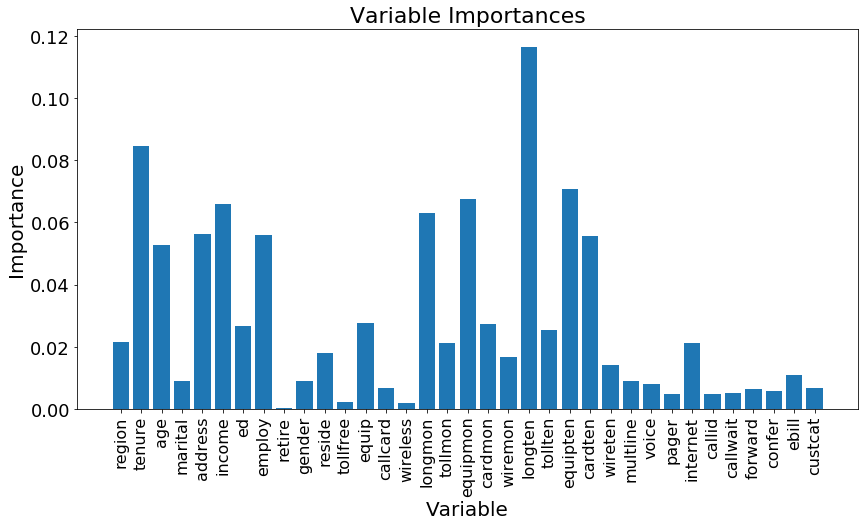

In [40]:
# list of x locations for plotting
fig = plt.figure(figsize = [14,7])
x_values = list(range(len(importances)))
print(zip(importances, moddf_list))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, moddf_list, rotation=90, fontsize = 16)
plt.yticks(fontsize = 18)
# Axis labels and title
plt.ylabel('Importance', fontsize = 20)
plt.xlabel('Variable', fontsize = 20)
plt.title('Variable Importances', fontsize = 22)

During this analysis, the effect of costumer's several different properties on their churn have been investigated. According to the results, varibles "tenure", "longten", and "income" are the most influencal ones. After running the method with several different training sample sizes, the outcomes are very similar. These results are similar, what was gathered during linear regression and decision trees.